In [194]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [195]:
fishes = pd.read_csv('2-data.csv')
fishes_reserved = pd.read_csv('3-data.csv')

X_train = fishes.drop(columns=['Weight'])
y_train = fishes[['Weight']]
X_test = fishes_reserved

fishes.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550


In [196]:
X_train_width_mean = X_train['Width'].mean()
round(X_train_width_mean, 3)

4.507

In [197]:
# избавимся от категориальных признаков

X_train_noncat = X_train.drop(columns='Species')
X_test_noncat = X_test.drop(columns='Species')

In [198]:
# обучим модель линейной регрессии

model1 = LinearRegression().fit(X_train_noncat, y_train)
# выполним предсказание для тестового набора данных
prediction1 = model1.predict(X_test_noncat)
# оценим точность модели на тренировочных данных
prediction_check = model1.predict(X_train_noncat)
score_test = r2_score(y_train, prediction_check)
print('model1 score:', round(score_test, 3))

model1 score: 0.881


In [199]:
# построим матрицу корреляций признаков тренировочных данных

correlation_matrix = X_train.corr(numeric_only=True) # только по числовым признакам
correlation_matrix

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999457,0.991043,0.621868,0.862072
Length2,0.999457,1.000000,0.993469,0.638003,0.868714
Length3,0.991043,0.993469,1.000000,0.704594,0.872468
Height,0.621868,0.638003,0.704594,1.000000,0.783475
Width,0.862072,0.868714,0.872468,0.783475,1.000000


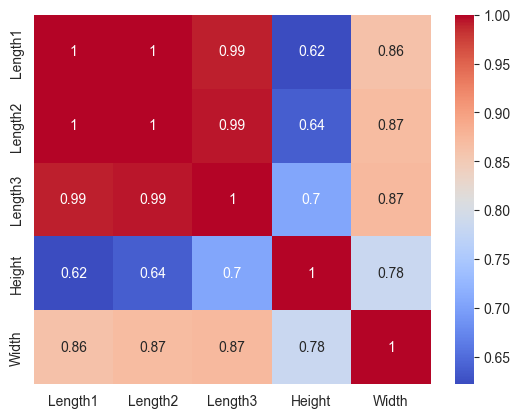

In [200]:
# создадим тепловую карту по матрице

fig = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [201]:
# применим метод главных компонент для избавления от коррелированных признаков

max_correlated = X_train[['Length1', 'Length2', 'Length3']]

pca = PCA(n_components=3, svd_solver='full')
max_correlated_pca = pca.fit(max_correlated)

In [202]:
# вычислим долю объясненной дисперсии при использовании только первой ГК

pca_explained_variance = pca.explained_variance_ratio_[0]
round(pca_explained_variance, 3)

0.996

In [203]:
# применим МГК с 1 компонентой и заменим данные

pca_1component = PCA(n_components=1, svd_solver='full').fit(max_correlated)
lengths = pca_1component.transform(max_correlated)

X_train = X_train.drop(columns=['Length1', 'Length2', 'Length3'])
X_train['Lengths'] = lengths

In [204]:
max_correlated = X_test[['Length1', 'Length2', 'Length3']]
lengths = pca_1component.transform(max_correlated)

X_test = X_test.drop(columns=['Length1', 'Length2', 'Length3'])
X_test['Lengths'] = lengths

In [205]:
X_train_final = X_train.drop(columns='Species')
X_test_final = X_test.drop(columns='Species')

model2 = LinearRegression().fit(X_train_final, y_train)
prediction2 = model2.predict(X_test_final)

prediction_check = model2.predict(X_train_final)
score_test = r2_score(y_train, prediction_check)
print('model2 score', round(score_test, 3))

model2 score 0.875


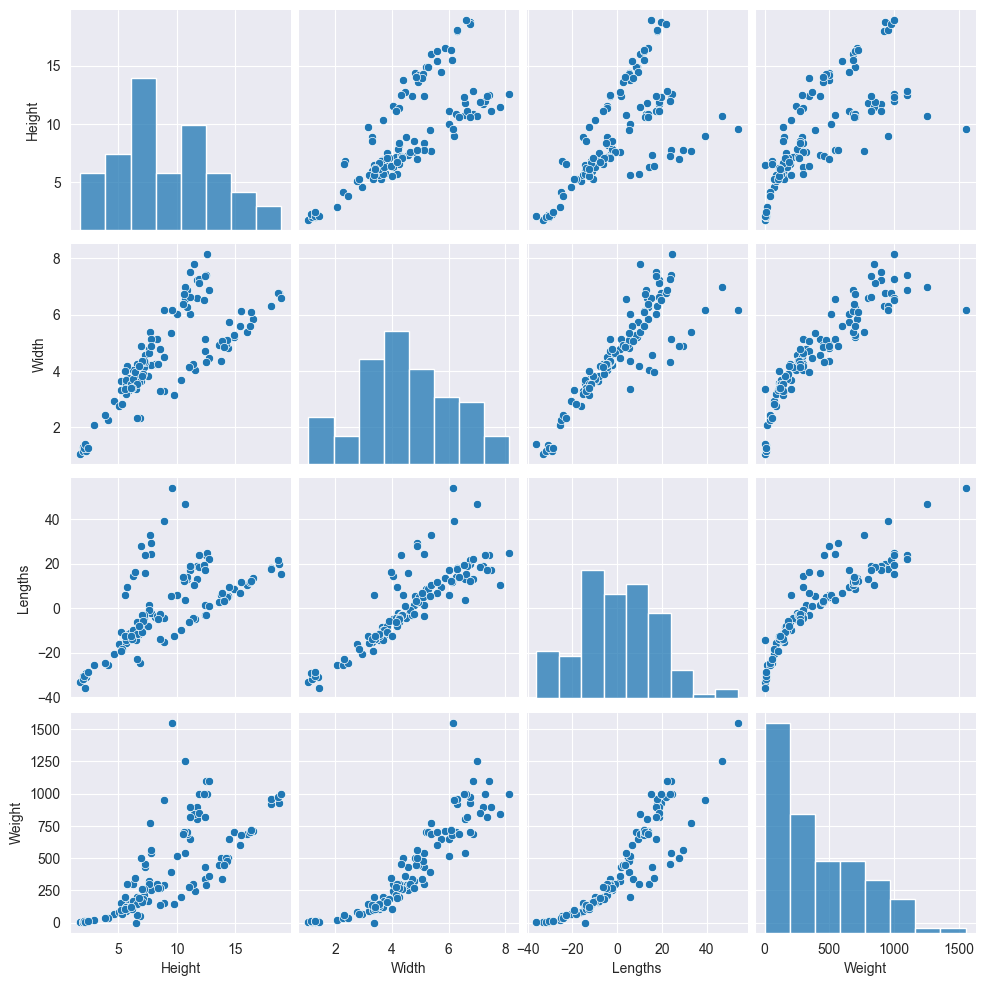

In [206]:
sns.pairplot(pd.concat([X_train.drop(columns=['Species']), y_train], axis=1))
plt.show()

In [207]:
# возведем признаки в 3 степень

X_train = pd.concat([X_train[['Species']], X_train[['Height', 'Width', 'Lengths']] ** 3], axis=1)
X_test = pd.concat([X_test['Species'], X_test[['Height', 'Width', 'Lengths']] ** 3], axis=1)

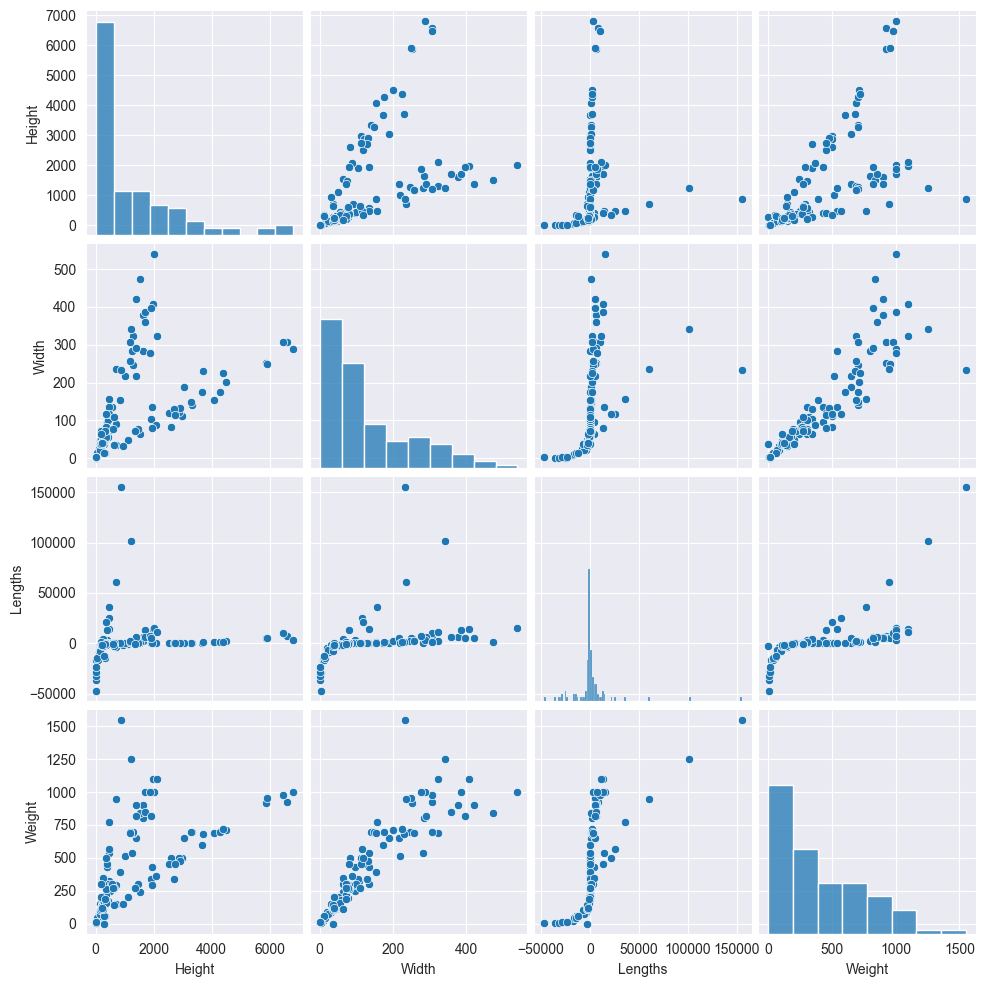

In [208]:
# проверка зависимости на линейность

sns.pairplot(pd.concat([X_train.drop(columns=['Species']), y_train], axis=1))
plt.show()

In [209]:
X_train_width_mean = X_train['Width'].mean()
round(X_train_width_mean, 3)

128.929

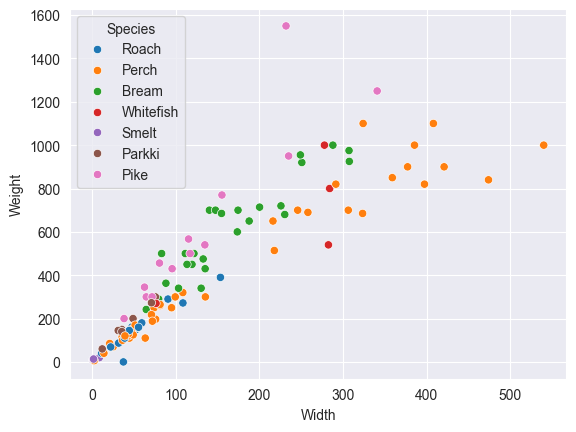

In [210]:
sns.scatterplot(pd.concat([X_train, y_train], axis=1), x=X_train['Width'], y=y_train['Weight'], hue=X_train['Species'])
plt.show()

In [211]:
X_train_final = X_train.drop(columns='Species')
X_test_final = X_test.drop(columns='Species')

model3 = LinearRegression().fit(X_train_final, y_train)
prediction3 = model3.predict(X_test_final)

prediction_check = model3.predict(X_train_final)
score_test = r2_score(y_train, prediction_check)
print('model3 score', round(score_test, 3))

model3 score 0.946


In [212]:
X_train_dum = pd.get_dummies(X_train[['Species']])
X_train_onehot = pd.concat([X_train_dum, X_train.drop(columns=['Species'])], axis=1)

X_test_dum = pd.get_dummies(X_test[['Species']])
X_test_onehot = pd.concat([X_test_dum, X_test.drop(columns=['Species'])], axis=1)

model4 = LinearRegression().fit(X_train_onehot, y_train)
prediction4 = model4.predict(X_test_onehot)

prediction_check = model4.predict(X_train_onehot)
score_test = r2_score(y_train, prediction_check)
print('model4 score', round(score_test, 3))

model4 score 0.959


In [213]:
X_train_dum = pd.get_dummies(X_train[['Species']], drop_first=True)
X_train = pd.concat([X_train_dum, X_train.drop(columns=['Species'])], axis=1)

X_test_dum = pd.get_dummies(X_test[['Species']], drop_first=True)
X_test = pd.concat([X_test_dum, X_test.drop(columns=['Species'])], axis=1)

model5 = LinearRegression().fit(X_train, y_train)
prediction5 = model5.predict(X_test)

prediction_check = model5.predict(X_train)
score_test = r2_score(y_train, prediction_check)
print('model5 score', round(score_test, 3))

model5 score 0.959


In [214]:
lyst = ''
for num in prediction5:
  lyst += str(num[0]) + ', '
lst = lyst[:-2]
print(lst)

115.09542494137975, 167.1693625078853, 119.5336295542827, 119.97354349528285, 85.49662161209486, 198.10125497679252, 67.21469220825716, 432.061037518457, 382.2113542772365, 126.02863666295696, 2105.9182943601654, 188.76392422583547, 602.9177533713303, 1039.4878561457967, 5.133843526726821, 581.2627514203191, 126.20333169504893, 813.3010044649195, 1461.8267320431924, 120.7612718324016, 564.7115442862664, 193.46121624442355, 115.65108457763861, 196.23823087868487, 354.49066243385454, 598.8735786587926, 371.0283091624559, 26.12026373188857, 85.38774392355165, -16.790360075521107, 938.6825472093695, 511.7652308661434, 533.4781606448557, 172.3109638517207, 38.30231951500167, 78.63940409838636, 165.87254619804438, 942.168432287946, 751.459740727207, 173.9742787224149
